In [3]:
from fastbook import *

In [4]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls), urls[0]

(1,
 'https://www.lovethegarden.com/sites/default/files/content/articles/UK_wildbirds-15-goldcrest.jpg')

In [6]:
dest = Path('bird.jpg')
if not dest.exists():download_url(urls[0], dest, show_progress = False)

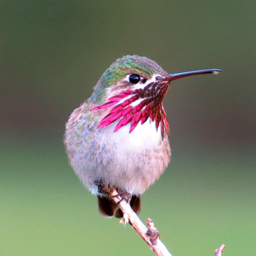

In [7]:
im = Image.open(dest)
im.to_thumb(256,256)

In [8]:
# Liste des termes de recherche
searches = ['forest', 'bird']

# Chemin du répertoire principal
path = Path('bird_or_not')

# Vérification et création du répertoire principal
if not path.exists():
    path.mkdir()

# Boucle sur chaque terme de recherche
for search_term in searches:
    # Création du sous-répertoire pour chaque terme de recherche
    dest = path / search_term
    dest.mkdir(exist_ok=True)

    # Recherche d'images
    results = search_images_ddg(f'{search_term} photo')

    # Téléchargement des images
    #download_images(dest, urls=results[:200])

    # Redimensionnement des images
    #resize_images(dest, max_size=400, dest=dest)

In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#11) [None,None,None,None,None,None,None,None,None,None,None]

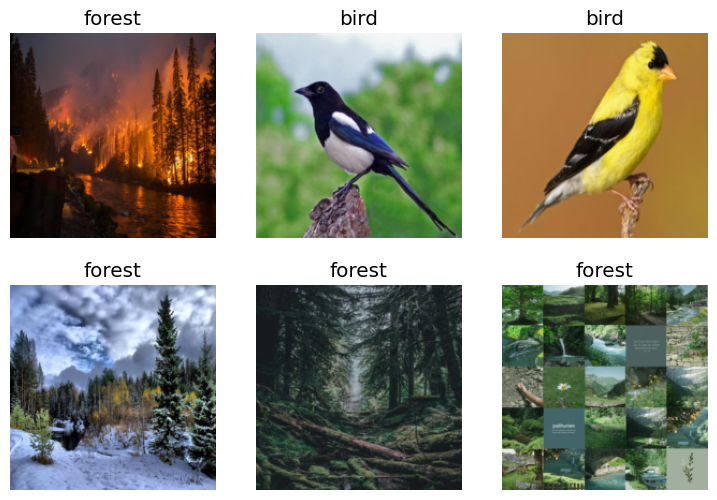

In [10]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.233174,0.605038,0.213115,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.355332,0.035948,0.016393,00:09
1,0.265516,0.004695,0.000000,00:09
2,0.194746,0.008144,0.000000,00:09
